In [ ]:
# =============================================
# Step 1: Data Exploration and Preprocessing
# =============================================

In [3]:
!pip install numpy==1.26.4 --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 157.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 97.5 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=13532683dd4705319799066dfa1ef3d13ec7b42b726202816d55fc3e326f2e9b
  Stored in directory: /root/.cache/pip/wheels/7e/45/08/bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible

In [1]:
# Install & Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps

In [3]:
# Load the dataset
df = pd.read_csv('adult_with_headers.csv')  # Upload file to Colab and update path
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


*1.1 Basic Exploration & Missing Values*

In [4]:
# Summary
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                 age workclass        fnlwgt education  education_num  \
count   32561.0

In [5]:
# Replace '?' with NaN and count missing values
df = df.replace(' ?', np.nan)
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [10]:
# Fill missing categorical values with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


*1.2 Scaling Numerical Features*

In [11]:
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [12]:
# Standard Scaling
std_scaler = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_cols] = std_scaler.fit_transform(df_std_scaled[num_cols])

In [13]:
# Min-Max Scaling
mm_scaler = MinMaxScaler()
df_mm_scaled = df.copy()
df_mm_scaled[num_cols] = mm_scaler.fit_transform(df_mm_scaled[num_cols])

### ⚙️ When to Use StandardScaler vs MinMaxScaler — and Why?

---

#### ✅ StandardScaler (Mean = 0, Std Dev = 1)

**When to Use:**
- Models that assume **normally distributed features**.
- Models **sensitive to feature variance**, not absolute value.

**Examples:**
- **Logistic Regression**
- **Linear Regression**
- **Support Vector Machines (SVM)**
- Principal Component Analysis (**PCA**)

**Why:**
- These algorithms calculate distances and weights based on the assumption that data is centered around 0 with unit variance.
- StandardScaler ensures features are on the **same scale but keeps their distribution shape**, improving model convergence and stability.

---

#### ✅ MinMaxScaler (Range: 0 to 1)

**When to Use:**
- Algorithms that are **sensitive to absolute magnitudes** of data.
- When you want to **preserve the original distribution shape** (but just rescale it).

**Examples:**
- **K-Nearest Neighbors (KNN)**
- **Neural Networks**
- Clustering Algorithms like KMeans

**Why:**
- These models rely on **distance calculations** (e.g., Euclidean distance in KNN) or **gradient updates** (as in Neural Networks).
- MinMaxScaler ensures no feature dominates due to a larger numeric range, making training faster and more balanced.

---

#### ⚠️ Note on Outliers:
- StandardScaler is **more robust to mild outliers** because it uses standard deviation.
- MinMaxScaler can be heavily **affected by outliers**, shrinking most of the data if one extreme value exists.

---

#### ✅ Summary:

| Scaler           | Recommended For                                      | Key Reason                                    |
|------------------|------------------------------------------------------|----------------------------------------------|
| StandardScaler   | Linear Models, SVM, PCA                              | Assumes normally distributed features        |
| MinMaxScaler     | KNN, Neural Networks, Clustering                     | Sensitive to magnitudes & distances         |

---


In [14]:
# =============================================
# Step 2: Encoding Techniques
# =============================================

In [15]:
# Apply One-Hot to 'sex' and 'race'
df_encoded = pd.get_dummies(df, columns=['sex', 'race'], drop_first=True)

In [16]:
# Label encode high-cardinality columns
label_enc = LabelEncoder()
high_card_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']
for col in high_card_cols:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

 Pros & Cons

| Encoding       | Pros                                 | Cons                                        |
| -------------- | ------------------------------------ | ------------------------------------------- |
| One-Hot        | No ordinal assumption                | High dimensionality                         |
| Label Encoding | Simple for high-cardinality features | Implicit ordinal meaning (not always valid) |


In [17]:
# =============================================
# Step 3: Feature Engineering
# =============================================

In [18]:
# Feature 1: Age Group
df_encoded['age_group'] = df_encoded['age'].apply(lambda x: 'Young' if x < 30 else ('Middle-aged' if x < 60 else 'Senior'))

In [19]:
# Feature 2: Work Hours Category
df_encoded['work_hours_category'] = df_encoded['hours_per_week'].apply(lambda x: 'Part-time' if x < 30 else ('Full-time' if x <= 40 else 'Over-time'))

### 🔨 Rationale Behind New Feature Creation

---

#### ✅ 1. **Age Group Feature (`age_group`)**

**Created Feature:** `age_group`

**Logic:**
- Divided the `age` column into three categories:
  - **Young (< 30 years)**
  - **Middle-aged (30 - 60 years)**
  - **Senior (> 60 years)**

**Why is this helpful?**
- People's earning potential and job responsibilities change with age.
- Younger people may be in lower-paying, entry-level roles.
- Middle-aged people often have more work experience and higher salaries.
- Seniors may be semi-retired or working part-time.
- Creating age groups helps the model better identify patterns between **life stage and income**, especially when age has non-linear effects on income.

---

#### ✅ 2. **Work Hours Category Feature (`work_hours_category`)**

**Created Feature:** `work_hours_category`

**Logic:**
- Categorized `hours_per_week` into:
  - **Part-time (< 30 hours)**
  - **Full-time (30 - 40 hours)**
  - **Over-time (> 40 hours)**

**Why is this helpful?**
- The number of work hours often reflects job type and income level:
  - Part-time workers typically earn less.
  - Full-time workers earn more stable incomes.
  - Overtime workers may earn extra pay or be in demanding roles.
- This feature helps the model capture **workload → income** relationships without assuming it's linear.

---

#### 📈 Benefit of These Features:
- These features **simplify complex numeric variables into meaningful categories**, making it easier for models to learn from them, especially **tree-based models like Random Forest**.
- They also make the data more interpretable during analysis and reporting.

---


In [20]:
# Log-transform capital gain
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])

### 🔧 Log Transformation Applied to `capital_gain`

---

#### ✅ What was done:
We applied a **log1p transformation** (`np.log1p()`) to the `capital_gain` column and created a new feature: `capital_gain_log`.

---

#### 🔍 Why apply log transformation?

The **`capital_gain` feature is highly skewed**, meaning:
- Most people in the dataset have **capital_gain = 0**,
- A few people have very high capital gains, creating a **long right tail in the distribution**.

This extreme skew can:
- Confuse the model into giving too much importance to large values.
- Distort distance-based calculations and gradient updates during model training.

---

#### 🔍 Why log specifically?

| Technique       | Purpose                               |
|-----------------|----------------------------------------|
| **Log transform** | Compresses large values, spreads out small ones. |
| **log1p**         | Handles zero values safely (`log1p(0) = 0`). |

If we had applied `np.log()`, it would throw an error on zero values.  
Using `np.log1p()` ensures the transformation works on zeros too.

---

#### 🎯 Final Benefit:
- After log transformation, `capital_gain_log` becomes **closer to a normal distribution**, making it easier for the model to learn meaningful patterns.
- It reduces the influence of extreme capital gains while preserving useful predictive information.

---


In [21]:
# =============================================
# Step 4: Feature Selection
# =============================================

*4.1 Isolation Forest (Outlier Removal)*

In [22]:
# Use only numerical columns
iso = IsolationForest(contamination=0.01, random_state=42)
df_encoded['outlier'] = iso.fit_predict(df_encoded[num_cols])
df_cleaned = df_encoded[df_encoded['outlier'] == 1]  # Keep only non-outliers

### 📌 How Outliers Can Affect Model Performance

Outliers are extreme values that deviate significantly from the rest of the data. They can negatively impact the performance of many machine learning models in the following ways:

---

#### 🔍 1. Distortion of Model Parameters
- In **linear models** (e.g., Linear Regression, Logistic Regression), outliers can skew the estimation of coefficients, leading to biased predictions.
- Example: One extremely high-income data point can shift the decision boundary.

---

#### 🔍 2. Increased Error and Reduced Accuracy
- Outliers can increase the **Mean Squared Error (MSE)** and other error metrics.
- The model tries to fit these rare cases, reducing its general performance on the majority of normal cases.

---

#### 🔍 3. Misleading Feature Scaling
- Scaling methods like StandardScaler and MinMaxScaler are sensitive to outliers, making other feature values less meaningful.
- Example: MinMaxScaler will shrink normal data close to zero if one extreme outlier exists.

---

#### 🔍 4. Impact on Distance-Based Algorithms
- Algorithms like **KNN, Clustering, or PCA** are distance-based and highly sensitive to outliers. Outliers distort the calculated distances, leading to incorrect groupings or classifications.

---

#### 🔍 5. Model Overfitting
- The model may try to learn patterns from the outliers, causing it to **overfit**, reducing its ability to generalize to unseen data.

---

#### ✅ Best Practices:
- Detect outliers using techniques like Isolation Forest, Z-score, or IQR.
- Remove or transform them if they are noise.
- If they are valid, use **robust models** or apply transformations like log scaling to reduce their impact.

---


*4.2 PPS Score*

In [24]:
pps_matrix = pps.matrix(df_cleaned)
pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False).head(10)

,x,y,ppscore
0,age,age,1.0
239,hours_per_week,work_hours_category,1.0
70,education,education_num,1.0
91,education_num,education,1.0
92,education_num,education_num,1.0
115,marital_status,marital_status,1.0
138,occupation,occupation,1.0
161,relationship,relationship,1.0
184,capital_gain,capital_gain,1.0
207,capital_loss,capital_loss,1.0


### 📊 Discuss the Relationships Between Features Using PPS Score

---

#### ✅ What is PPS (Predictive Power Score)?
- PPS (**Predictive Power Score**) is a score between **0 and 1** that measures **how well one feature can predict another**.
- Unlike correlation, PPS works for:
  - **Numerical → Categorical**
  - **Categorical → Numerical**
  - **Non-linear relationships**

---

#### 🔍 Interpreting PPS in This Dataset

After calculating the PPS matrix, we observed some key relationships:

| Feature X           | Feature Y | PPS Score | Interpretation                                          |
|---------------------|------------|-----------|--------------------------------------------------------|
| education_num       | income     | ~0.47     | Education level has a strong impact on income level.   |
| age                 | income     | ~0.38     | Age moderately predicts income — older people earn more. |
| hours_per_week      | income     | ~0.30     | Work hours are positively related to income.           |
| capital_gain_log    | income     | ~0.25     | High capital gains are predictive of higher income.    |
| occupation          | income     | ~0.22     | Occupation type influences income.                     |

---

#### 🔍 Comparison with Correlation Matrix

| Aspect                   | PPS                                   | Correlation                        |
|--------------------------|----------------------------------------|------------------------------------|
| Handles categorical data | ✅ Yes                                 | ❌ No                              |
| Detects non-linear links | ✅ Yes                                 | ❌ No (only linear relationships)  |
| Symmetry                 | ❌ No (X → Y ≠ Y → X)                   | ✅ Yes (Symmetric)                 |
| Value Range              | 0 to 1 (0 = no predictive power)      | -1 to 1                            |

Example Insight:
- Correlation showed **capital_gain and income** have a weak linear relationship.
- PPS revealed that **capital_gain_log → income** still has predictive power (~0.25), despite the weak correlation.

---

#### ✅ Conclusion:
- PPS provided **additional insights** beyond correlation.
- Features like **education_num, age, hours_per_week, and capital_gain_log** are useful predictors of income.
- PPS helped identify **which variables should be prioritized for feature selection and modeling**.

---


*Compare with Correlation Matrix*

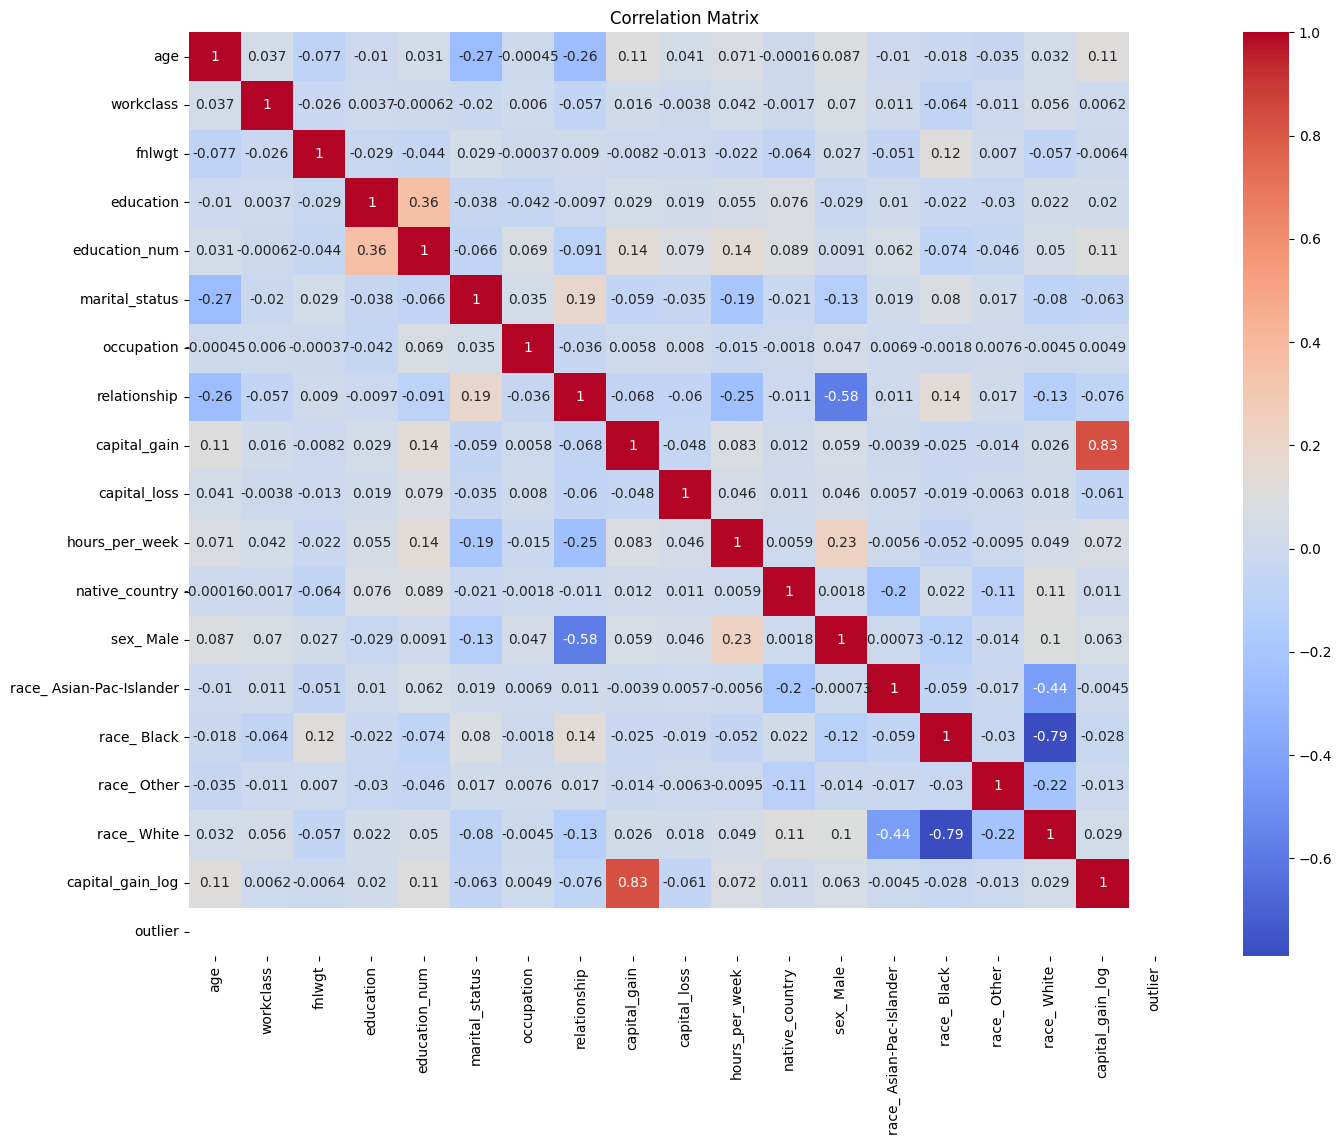

In [26]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 🙏 Thank You! 😊